In [1]:
import warnings
warnings.filterwarnings(
    action='ignore',
    category=FutureWarning
)

In [2]:
import os

import FACSPy as fp
import scanpy as sc

import figure_config as cfg

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib.gridspec import GridSpec

from matplotlib.figure import Figure
from matplotlib.axes import Axes
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerBase

from matplotlib import colors

import math

In [4]:
sc.set_figure_params(vector_friendly=True, dpi_save=300)

In [5]:
nk_cells = fp.read_dataset(cfg.data_input, "dataset_NK_preprocessed")
df = nk_cells.to_df(layer = "transformed")
sampled = df.sample(frac = 1)
nk_cells = nk_cells[sampled.index,:]

nk_cells.uns["metadata"].dataframe["group"] = nk_cells.uns["metadata"].dataframe["diag_main"]

set1_colors = sns.color_palette("Set1")[0:2]
nk_cells.uns["organ_colors"] = [colors.to_hex(color) for color in set1_colors]
set2_colors = sns.color_palette("Set2")[0:3]
nk_cells.uns["organ_diag_colors"] = [colors.to_hex(color) for color in set2_colors]

C:\Users\tarik\AppData\Local\Temp\ipykernel_21460\1658907848.py:9: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  nk_cells.uns["organ_colors"] = [colors.to_hex(color) for color in set1_colors]


In [6]:
fp.settings.default_gate = "NK_cells"
fp.settings.default_layer = "transformed"

In [7]:
sf = fp.read_dataset(cfg.data_input, "dataset_NK_SF_preprocessed")

In [8]:
def generate_subfigure_a(fig: Figure,
                         ax: Axes,
                         gs: GridSpec,
                         subfigure_label) -> None:
    ax.axis("off")
    cfg.figure_label(ax, subfigure_label, x = 0)
    
    fig_sgs = gs.subgridspec(1,2)
    
    umap_organ_plot = fig.add_subplot(fig_sgs[0])
    umap_organ_plot = fp.pl.umap(
        nk_cells,
        color = "organ",
        show = False,
        ax = umap_organ_plot
    )
    umap_organ_plot.set_xlabel(umap_organ_plot.get_xlabel(), fontsize = cfg.AXIS_LABEL_SIZE)
    umap_organ_plot.set_ylabel(umap_organ_plot.get_ylabel(), fontsize = cfg.AXIS_LABEL_SIZE)
    umap_organ_plot.set_title("organ", fontsize = cfg.TITLE_SIZE)
    handles, labels = umap_organ_plot.get_legend_handles_labels()
    umap_organ_plot.legend(handles,
                           ["peripheral blood", "synovial fluid"],
                           bbox_to_anchor = (0.5, -0.1),
                           loc = "upper center",
                           fontsize = cfg.AXIS_LABEL_SIZE)

    umap_organ_diag_plot = fig.add_subplot(fig_sgs[1])
    umap_organ_diag_plot = fp.pl.umap(
        nk_cells,
        color = "organ_diag",
        show = False,
        ax = umap_organ_diag_plot
    )
    umap_organ_diag_plot.set_xlabel(umap_organ_diag_plot.get_xlabel(), fontsize = cfg.AXIS_LABEL_SIZE)
    umap_organ_diag_plot.set_ylabel(umap_organ_diag_plot.get_ylabel(), fontsize = cfg.AXIS_LABEL_SIZE)
    umap_organ_diag_plot.set_title("\n\norgan and group", fontsize = cfg.TITLE_SIZE)
    handles, labels = umap_organ_diag_plot.get_legend_handles_labels()
    umap_organ_diag_plot.legend(handles,
                                labels, #["peripheral blood", "synovial fluid"],
                                bbox_to_anchor = (0.5, -0.1),
                                loc = "upper center",
                                fontsize = cfg.AXIS_LABEL_SIZE)
    return

In [9]:
def generate_subfigure_b(fig: Figure,
                         ax: Axes,
                         gs: GridSpec,
                         subfigure_label) -> None:
    ax.axis("off")
    cfg.figure_label(ax, subfigure_label, x = 0)
    
    fig_sgs = gs.subgridspec(2,3)

    for i, marker in enumerate(["CD56", "CD69", "NKG2A_(CD159a)", "CD16", "TIGIT", "CD57"]):
        marker_plot = fig.add_subplot(fig_sgs[0 if i<=2 else 1, i%3])
        marker_plot = fp.pl.umap(
            nk_cells,
            color = marker,
            show = False,
            s = 2,
            ax = marker_plot,
            vmin = 0
        )
        if marker == "NKG2A_(CD159a)":
            marker = "NKG2A"
        marker_plot.set_xlabel(marker_plot.get_xlabel(), fontsize = cfg.AXIS_LABEL_SIZE)
        marker_plot.set_ylabel(marker_plot.get_ylabel(), fontsize = cfg.AXIS_LABEL_SIZE)
        marker_plot.set_title(f"\n{marker}", fontsize = cfg.TITLE_SIZE)
        marker_plot._children[0].colorbar.ax.set_ylabel("")
        marker_plot._children[0].colorbar.ax.tick_params(labelsize = cfg.AXIS_LABEL_SIZE)
    return

In [10]:
def generate_subfigure_c(fig: Figure,
                         ax: Axes,
                         gs: GridSpec,
                         subfigure_label) -> None:
    ax.axis("off")
    cfg.figure_label(ax, subfigure_label, x = 0)
    
    fig_sgs = gs.subgridspec(1,2)
    
    leiden_clusters = fig.add_subplot(fig_sgs[0])
    leiden_clusters = fp.pl.umap(
        sf,
        color = "NK_cells_transformed_leiden",
        show = False,
        ax = leiden_clusters
    )
    leiden_clusters.set_xlabel(leiden_clusters.get_xlabel(), fontsize = cfg.AXIS_LABEL_SIZE)
    leiden_clusters.set_ylabel(leiden_clusters.get_ylabel(), fontsize = cfg.AXIS_LABEL_SIZE)
    leiden_clusters.set_title("\n\nleiden clusters", fontsize = cfg.TITLE_SIZE)
    handles, labels = leiden_clusters.get_legend_handles_labels()
    leiden_clusters.legend(handles,
                           labels,
                           bbox_to_anchor = (0.5, -0.1),
                           loc = "upper center",
                           fontsize = cfg.AXIS_LABEL_SIZE,
                           ncols = math.ceil(len(labels)/2))

    metaclusters = fig.add_subplot(fig_sgs[1])
    metaclusters = fp.pl.umap(
        sf,
        color = "leiden_group",
        show = False,
        ax = metaclusters,
        #legend_loc = "on data"
    )
    metaclusters.set_xlabel(metaclusters.get_xlabel(), fontsize = cfg.AXIS_LABEL_SIZE)
    metaclusters.set_ylabel(metaclusters.get_ylabel(), fontsize = cfg.AXIS_LABEL_SIZE)
    metaclusters.set_title("\n\nmetaclusters", fontsize = cfg.TITLE_SIZE)
    handles, labels = metaclusters.get_legend_handles_labels()
    metaclusters.legend(handles,
                        labels,
                        bbox_to_anchor = (0.5, -0.1),
                        loc = "upper center",
                        fontsize = cfg.AXIS_LABEL_SIZE)

    return

In [11]:
def generate_subfigure_d(fig: Figure,
                         ax: Axes,
                         gs: GridSpec,
                         subfigure_label) -> None:
    ax.axis("off")
    cfg.figure_label(ax, subfigure_label, x = 0)
    
    fig_sgs = gs.subgridspec(2,3)

    for i, marker in enumerate(["CD56", "CD69", "NKG2A_(CD159a)", "CD16", "TIGIT", "CD57"]):
        marker_plot = fig.add_subplot(fig_sgs[0 if i<=2 else 1, i%3])
        marker_plot = fp.pl.umap(
            sf,
            color = marker,
            show = False,
            ax = marker_plot,
            vmin = 0
        )
        if marker == "NKG2A_(CD159a)":
            marker = "NKG2A"
        marker_plot.set_xlabel(marker_plot.get_xlabel(), fontsize = cfg.AXIS_LABEL_SIZE)
        marker_plot.set_ylabel(marker_plot.get_ylabel(), fontsize = cfg.AXIS_LABEL_SIZE)
        marker_plot.set_title(f"\n{marker}", fontsize = cfg.TITLE_SIZE)
        marker_plot._children[0].colorbar.ax.set_ylabel("")
        marker_plot._children[0].colorbar.ax.tick_params(labelsize = cfg.AXIS_LABEL_SIZE)
    return

In [12]:
def generate_subfigure_e(fig: Figure,
                         ax: Axes,
                         gs: GridSpec,
                         subfigure_label) -> None:
    ax.axis("off")
    cfg.figure_label(ax, subfigure_label, x = 0)
    fig_sgs = gs.subgridspec(1,3)

    comp1 = fig.add_subplot(fig_sgs[0,0])
    comp2 = fig.add_subplot(fig_sgs[0,1])
    comp3 = fig.add_subplot(fig_sgs[0,2])
    
    comp1 = fig.add_subplot(
        fp.pl.fold_change(sf,
                          layer = "compensated",
                          data_group = "leiden_group",
                          groupby = "leiden_group",
                          group1 = "metacluster 1", 
                          group2 = "metacluster 2",
                          comparison_label = " ",
                          ax = comp1,
                          show = False)
    )
    
    comp2 = fig.add_subplot(
        fp.pl.fold_change(sf,
                          layer = "compensated",
                          data_group = "leiden_group",
                          groupby = "leiden_group",
                          group1 = "metacluster 1", 
                          group2 = "metacluster 3",
                          comparison_label = " ",
                          ax = comp2,
                          show = False)
    )
    
    comp3 = fig.add_subplot(
        fp.pl.fold_change(sf,
                          layer = "compensated",
                          data_group = "leiden_group",
                          groupby = "leiden_group",
                          group1 = "metacluster 2", 
                          group2 = "metacluster 3",
                          comparison_label = " ",
                          ax = comp3,
                          show = False)
    )

    cfg._adjust_ylabels(comp1)
    comp1.set_xticklabels(comp1.get_xticklabels(), fontsize = cfg.AXIS_LABEL_SIZE)
    comp1.set_xlabel("asinh fold change", fontsize = cfg.AXIS_LABEL_SIZE)
    comp1.set_ylabel("", fontsize = cfg.AXIS_LABEL_SIZE)
    comp1.tick_params(size = cfg.AXIS_LABEL_SIZE, pad = 0, length = 0, which = "both")
    comp1.set_title(comp1.get_title(), fontsize = cfg.TITLE_SIZE)
    comp1._colorbars[0].set_yticklabels(comp1._colorbars[0].get_yticklabels(), fontsize = cfg.AXIS_LABEL_SIZE)
    comp1._colorbars[0].set_ylabel("", fontsize = cfg.AXIS_LABEL_SIZE)
    
    cfg._adjust_ylabels(comp2)
    comp2.set_xticklabels(comp2.get_xticklabels(), fontsize = cfg.AXIS_LABEL_SIZE)
    comp2.set_xlabel("asinh fold change", fontsize = cfg.AXIS_LABEL_SIZE)
    comp2.set_ylabel("", fontsize = cfg.AXIS_LABEL_SIZE)
    comp2.tick_params(size = cfg.AXIS_LABEL_SIZE, pad = 0, length = 0, which = "both")
    comp2.set_title(comp2.get_title(), fontsize = cfg.TITLE_SIZE)
    comp2._colorbars[0].set_yticklabels(comp2._colorbars[0].get_yticklabels(), fontsize = cfg.AXIS_LABEL_SIZE)
    comp2._colorbars[0].set_ylabel("", fontsize = cfg.AXIS_LABEL_SIZE)
    
    cfg._adjust_ylabels(comp3)
    comp3.set_xticklabels(comp3.get_xticklabels(), fontsize = cfg.AXIS_LABEL_SIZE)
    comp3.set_xlabel("asinh fold change", fontsize = cfg.AXIS_LABEL_SIZE)
    comp3.set_ylabel("", fontsize = cfg.AXIS_LABEL_SIZE)
    comp3.tick_params(size = cfg.AXIS_LABEL_SIZE, length = 0, which = "both")
    comp3.set_title(comp3.get_title(), fontsize = cfg.TITLE_SIZE)
    comp3._colorbars[0].set_yticklabels(comp3._colorbars[0].get_yticklabels(), fontsize = cfg.AXIS_LABEL_SIZE)
    comp3._colorbars[0].set_ylabel("", fontsize = cfg.AXIS_LABEL_SIZE)

    return

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Users\tarik\AppData\Local\Temp\ipykernel_21460\4133506892.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  comp1.s

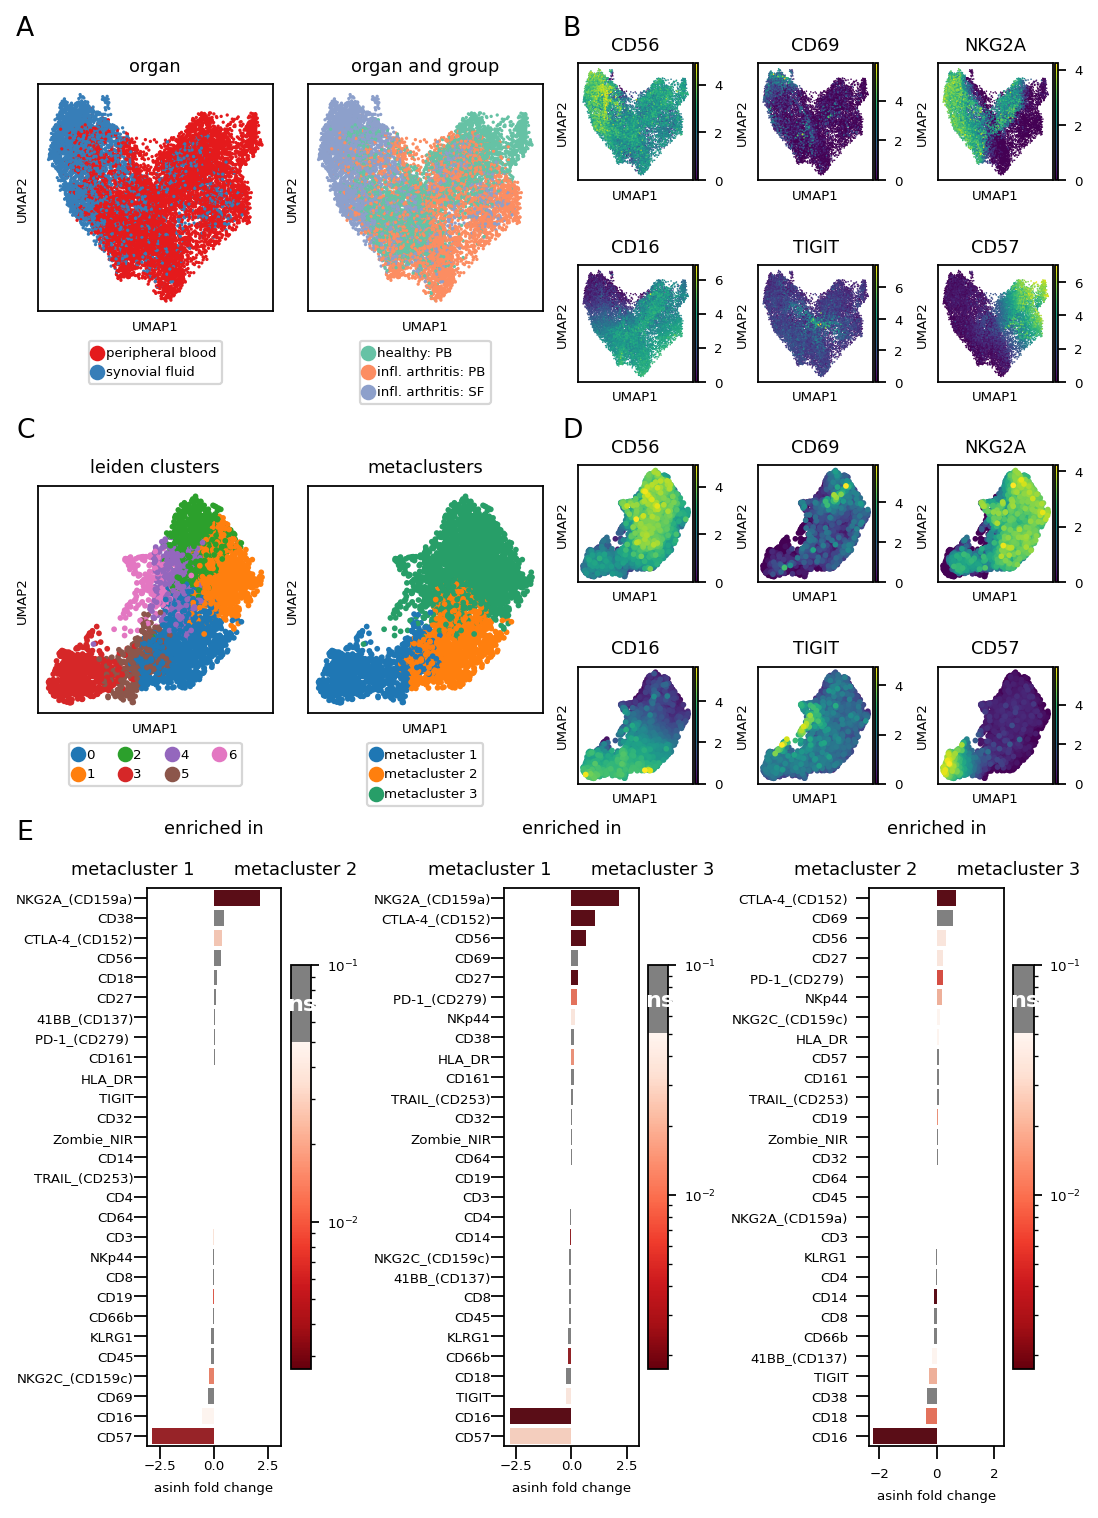

In [13]:
fig = plt.figure(layout = "constrained",
                 figsize = (cfg.FIGURE_WIDTH_FULL, cfg.FIGURE_HEIGHT_FULL))
gs = GridSpec(ncols = 6,
              nrows = 3,
              figure = fig,
              height_ratios = [1,1,1.8])
a_coords = gs[0,:3]
b_coords = gs[0,3:]
c_coords = gs[1,:3]
d_coords = gs[1,3:]
e_coords = gs[2,:]

fig_a = fig.add_subplot(a_coords)
fig_b = fig.add_subplot(b_coords)
fig_c = fig.add_subplot(c_coords)
fig_d = fig.add_subplot(d_coords)
fig_e = fig.add_subplot(e_coords)

generate_subfigure_a(fig, fig_a, a_coords, "A")
generate_subfigure_b(fig, fig_b, b_coords, "B")
generate_subfigure_c(fig, fig_c, c_coords, "C")
generate_subfigure_d(fig, fig_d, d_coords, "D")
sns.reset_defaults()
generate_subfigure_e(fig, fig_e, e_coords, "E")

plt.savefig(os.path.join(cfg.figure_output, "Figure2.pdf"), dpi = 300, bbox_inches = "tight")
plt.show()